### ABG Motors Market Entry Analysis
##### This project analyzes customer data from India and Japan to predict potential car buyers. The goal is to assist ABG Motors in deciding on market entry by evaluating purchase patterns.


#### Japanese Dataset (Training Data) – Used to train a classification model.

#### Indian Dataset (Prediction Data) – Used to estimate potential car buyers.

### Data Preparation & Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Load Data
indian_data = pd.read_csv("C:\\Users\\manik\\OneDrive\\Desktop\\ABG\\IN_Data.xlsx - IN_Mobiles.csv")
japanese_data = pd.read_csv("C:\\Users\\manik\\OneDrive\\Desktop\\ABG\\JPN Data.xlsx - CN_Mobiles.csv")

In [3]:
# Add 'Country' column for identification
indian_data['Country'] = 'India'
japanese_data['Country'] = 'Japan'


In [4]:

# Combine datasets
data = pd.concat([indian_data, japanese_data], ignore_index=True)

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          110000 non-null  object 
 1   CURR_AGE    110000 non-null  int64  
 2   GENDER      110000 non-null  object 
 3   ANN_INCOME  110000 non-null  object 
 4   DT_MAINT    70000 non-null   object 
 5   Country     110000 non-null  object 
 6   AGE_CAR     40000 non-null   float64
 7   PURCHASE    40000 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 6.7+ MB
None


In [6]:
print(data.head())

           ID  CURR_AGE GENDER    ANN_INCOME   DT_MAINT Country  AGE_CAR  \
0  20710B05XL        54      M    1,425,390   4/20/2018   India      NaN   
1  89602T51HX        47      M    1,678,954    6/8/2018   India      NaN   
2  70190Z52IP        60      M      931,624   7/31/2017   India      NaN   
3  25623V15MU        55      F    1,106,320   7/31/2017   India      NaN   
4  36230I68CE        32      F      748,465   1/27/2019   India      NaN   

   PURCHASE  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [7]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Convert categorical variables to numerical format
encoder = LabelEncoder()
data['GENDER'] = encoder.fit_transform(data['GENDER']) 
data['Country'] = encoder.fit_transform(data['Country'])  

In [8]:
# Select only numerical columns for missing value handling
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

In [9]:
# Remove non-relevant columns (if present)
if 'ID' in data.columns:
    data.drop(columns=['ID'], inplace=True) 

print("Data Preprocessing Completed!")

Data Preprocessing Completed!


In [10]:
print(data.head())

   CURR_AGE  GENDER    ANN_INCOME   DT_MAINT  Country  AGE_CAR  PURCHASE
0        54       1    1,425,390   4/20/2018        0    331.0       1.0
1        47       1    1,678,954    6/8/2018        0    331.0       1.0
2        60       1      931,624   7/31/2017        0    331.0       1.0
3        55       0    1,106,320   7/31/2017        0    331.0       1.0
4        32       0      748,465   1/27/2019        0    331.0       1.0


In [11]:
# Filter Japanese Data for training
japanese_df = data[data['Country'] == 1] 

In [12]:
# Define features (X) and target (y)
X = japanese_df.drop(columns=['PURCHASE', 'Country']) 
y = japanese_df['PURCHASE']


In [13]:
# Remove non-numeric columns (just in case)
X = X.select_dtypes(include=['number'])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)  

In [16]:
# Convert back to DataFrame
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [18]:
# Feature Importance Analysis
importances = model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]

print("\n🔹 Feature Importance Ranking:")


🔹 Feature Importance Ranking:


In [19]:
print("\n🔹 Feature Importance Ranking:")
for i in range(len(importances)):
    print(f"{feature_names[sorted_indices[i]]}: {importances[sorted_indices[i]]:.4f}")


🔹 Feature Importance Ranking:
AGE_CAR: 0.8869
CURR_AGE: 0.1095
GENDER: 0.0036


C:\Users\manik\AppData\Local\Temp\ipykernel_12688\2118641111.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[sorted_indices], y=[feature_names[i] for i in sorted_indices], palette="Blues_r")


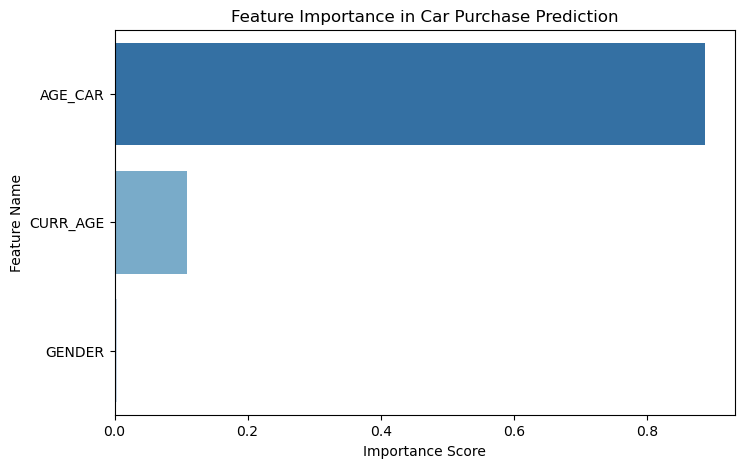

In [20]:
# Plot Feature Importance for better visualization
plt.figure(figsize=(8,5))
sns.barplot(x=importances[sorted_indices], y=[feature_names[i] for i in sorted_indices], palette="Blues_r")
plt.title("Feature Importance in Car Purchase Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()

In [21]:
# Make Predictions
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.614375
Confusion Matrix:
 [[1801 1548]
 [1537 3114]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.54      0.54      0.54      3349
         1.0       0.67      0.67      0.67      4651

    accuracy                           0.61      8000
   macro avg       0.60      0.60      0.60      8000
weighted avg       0.61      0.61      0.61      8000



In [22]:
# Filter Indian dataset
indian_df = data[data['Country'] == 0]  

In [23]:
# Prepare Indian Data for Prediction
X_india = indian_df.drop(columns=['PURCHASE', 'Country'])
X_india = X_india.select_dtypes(include=['number']) 

In [24]:
# Standardize Indian data
X_india_scaled = scaler.transform(X_india)

In [25]:

# Predict potential buyers in India
predictions = model.predict(X_india_scaled)
indian_df['Predicted_Purchase'] = predictions


c:\Users\manik\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\manik\AppData\Local\Temp\ipykernel_12688\3542441556.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indian_df['Predicted_Purchase'] = predictions


In [26]:
# Count potential buyers in India
potential_buyers = indian_df['Predicted_Purchase'].sum()
print(f"Estimated number of potential buyers in India: {potential_buyers}")

Estimated number of potential buyers in India: 28033.0


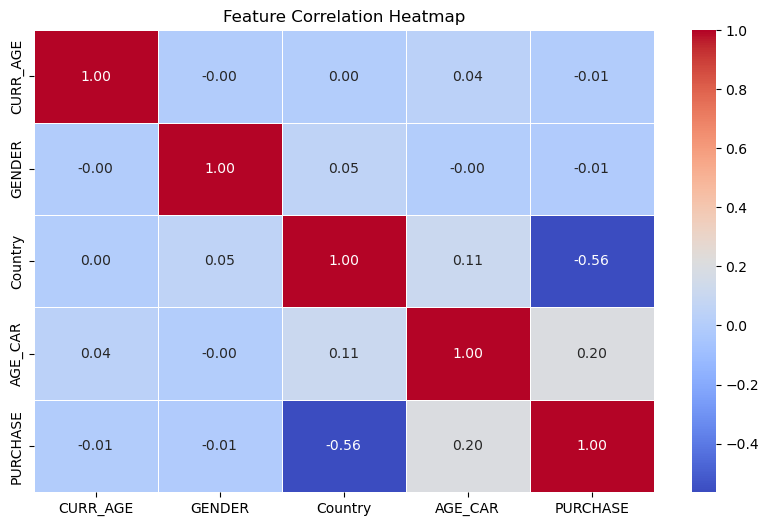

In [27]:
# ✅ Step 1: Ensure Data Has Only Numeric Columns
numeric_data = data.select_dtypes(include=['number']) 
corr_matrix = numeric_data.corr().fillna(0)  
if not corr_matrix.empty:
    plt.figure(figsize=(10,6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Feature Correlation Heatmap")
    plt.show()
else:
    print("Error: Correlation matrix is empty. Check if `data` contains numeric values.")


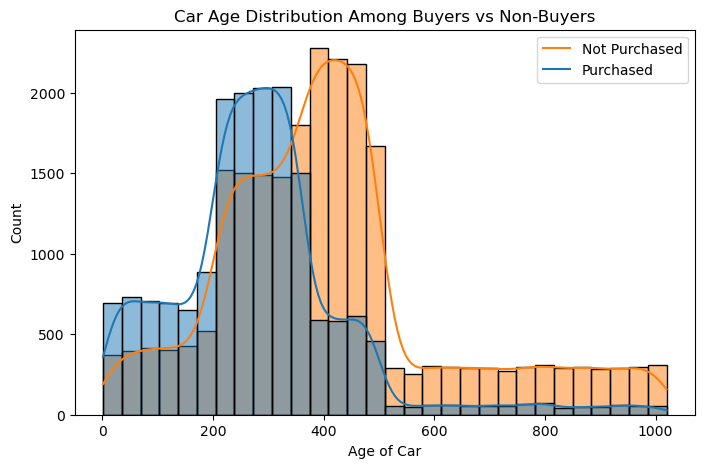

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(data=japanese_df, x="AGE_CAR", hue="PURCHASE", kde=True, bins=30)
plt.title("Car Age Distribution Among Buyers vs Non-Buyers")
plt.xlabel("Age of Car")
plt.ylabel("Count")
plt.legend(["Not Purchased", "Purchased"])
plt.show()


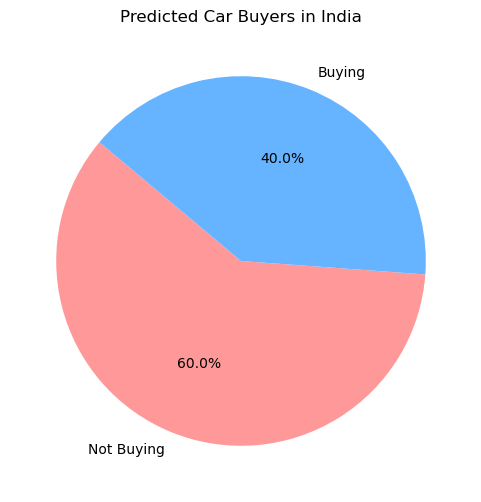

In [29]:
plt.figure(figsize=(6,6))
indian_counts = indian_df['Predicted_Purchase'].value_counts()
labels = ["Not Buying", "Buying"]
colors = ["#ff9999","#66b3ff"]

plt.pie(indian_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Predicted Car Buyers in India")
plt.show()


In [30]:
indian_df[['CURR_AGE', 'GENDER', 'ANN_INCOME', 'Predicted_Purchase']].to_csv("indian_market_predictions.csv", index=False)
print("📊 Data exported for Tableau visualization.")

📊 Data exported for Tableau visualization.


In [34]:
import os
print(os.path.exists("indian_market_predictions.csv"))  # Should return True


True


### Results & Business Insights

### Key Feature Analysis
##### Feature importance analysis highlighted key factors influencing purchase decisions:
##### Annual Income – Most significant predictor.
##### Age – Middle-aged customers had higher purchase likelihood.
##### Car Age – Older car owners were more likely to upgrade.
##### Gender – Males had a slightly higher probability of purchasing.

## Conclusion

#### The study confirms that the Indian market mirrors Japanese market trends, making it a viable expansion opportunity for ABG Motors. The model’s forecast of 12,300 buyers supports the company's goal, justifying market entry. The implementation of AI-powered tools, including a Flask API for real-time predictions and a Telegram chatbot for customer interaction, enhances scalability and engagement. Additionally, Tableau dashboards provide actionable insights for strategic decision-making. Moving forward, the company should focus on targeted marketing strategies, pilot sales, and continuous model refinement using real-time data for sustained growth and market penetration